In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Tải trang web
url = 'https://pokemondb.net/pokedex/all'
response = requests.get(url)
html_content = response.content

# Phân tích HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Tìm tất cả các dòng dữ liệu Pokemon
pokemon_rows = soup.select('tr')[1:]  # Bỏ qua dòng đầu tiên (tiêu đề)

# Mở file CSV để ghi dữ liệu
with open('pokemonData.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Viết tiêu đề cho các cột
    writer.writerow(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'])

    # Lặp qua từng dòng dữ liệu Pokemon
    for row in pokemon_rows:
        cells = row.select('td')

        # Trích xuất thông tin cần thiết
        pokedex_number = cells[0].select_one('span.infocard-cell-data').text
        name = cells[1].select_one('a.ent-name').text.strip()
        
        # Kiểm tra xem có tên khác trong small không
        form = cells[1].select_one('small.text-muted')
        if form:
            name += ' ' + form.text.strip()  # Thêm tên form nếu có
        
        types = [type.text for type in cells[2].select('a.type-icon')]
        stats = [stat.text for stat in cells[3:]]

        # Gộp Type1 và Type2
        type_combined = ' '.join(types)

        # Ghi dữ liệu vào file CSV
        writer.writerow([
            pokedex_number,
            name,  # Tên Pokémon với form
            type_combined,  # Gộp Type1 và Type2
            stats[0],  # Total
            stats[1],  # HP
            stats[2],  # Attack
            stats[3],  # Defense
            stats[4],  # Sp.Atk
            stats[5],  # Sp.Def
            stats[6]   # Speed
        ])

## Chuyển thành JSON


In [2]:
import csv
import json

def csv_to_json(csv_file_path, json_file_path):
    data = []
    
    # Đọc file CSV
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        # Chuyển từng dòng của file CSV thành dictionary và thêm vào list
        for row in csv_reader:
            data.append(row)
    
    # Ghi dữ liệu sang file JSON
    with open(json_file_path, mode='w') as json_file:
        json.dump(data, json_file, indent=4)
    
    print(f"Data from {csv_file_path} has been successfully converted to {json_file_path}")

# Sử dụng hàm
csv_to_json('pokemonData.csv', 'pokemon_data.json')


Data from pokemonData.csv has been successfully converted to pokemon_data.json


#### Thêm ảnh


In [3]:
import csv
import json

def csv_to_json_with_images(csv_file_path, json_file_path):
    data = []
    
    # Đọc file CSV
    with open(csv_file_path, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            # Thêm trường image_url với link hình ảnh dựa trên cột ID (#)
            row['image_url'] = f"https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{int(row['#'])}.png"
            data.append(row)
    
    # Ghi dữ liệu sang file JSON
    with open(json_file_path, mode='w') as json_file:
        json.dump(data, json_file, indent=4)
    
    print(f"Data with images from {csv_file_path} has been successfully converted to {json_file_path}")

# Sử dụng hàm
csv_to_json_with_images('pokemonData.csv', 'pokemonData.json')


Data with images from pokemonData.csv has been successfully converted to pokemonData.json


In [34]:
import pandas as pd

df = pd.read_csv('pokemonData.csv')

df.head(20)

,#,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
5,5,Charmeleon,Fire,405,58,64,58,80,65,80
6,6,Charizard,Fire Flying,534,78,84,78,109,85,100
7,6,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,6,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
9,7,Squirtle,Water,314,44,48,65,50,64,43


In [4]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Số lượng')

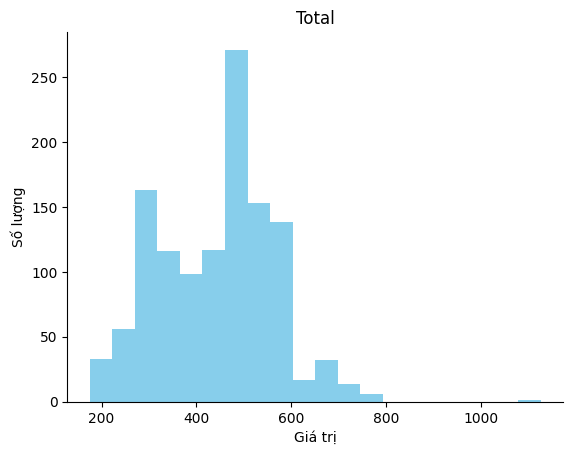

In [8]:
# @title Biểu đồ cột chỉ số Total của tất cả Pokemon
df['Total'].plot(kind='hist', bins=20, title='Total', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

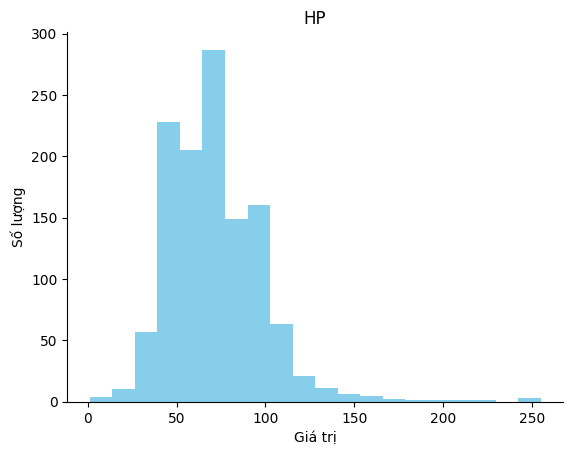

In [10]:
# @title Biểu đồ cột chỉ số HP của tất cả Pokemon
df['HP'].plot(kind='hist', bins=20, title='HP', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

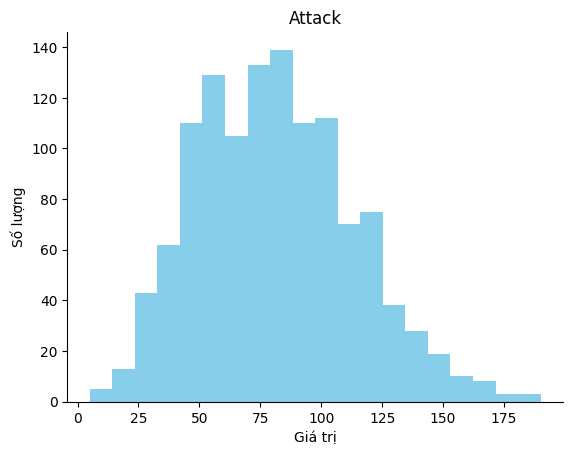

In [11]:
# @title Biểu đồ cột chỉ số Attack của tất cả Pokemon
df['Attack'].plot(kind='hist', bins=20, title='Attack', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

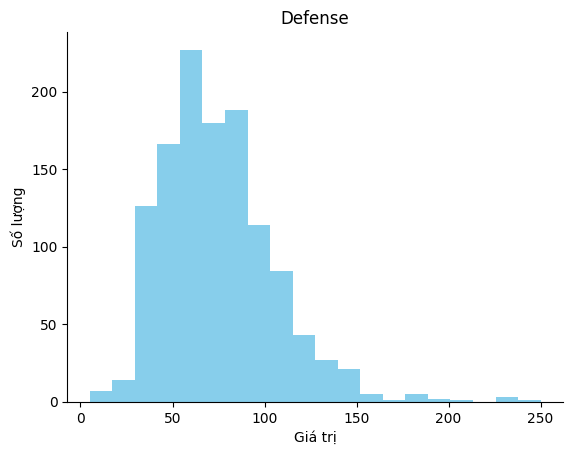

In [13]:
# @title Biểu đồ cột chỉ số Defense của tất cả Pokemon
df['Defense'].plot(kind='hist', bins=20, title='Defense', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

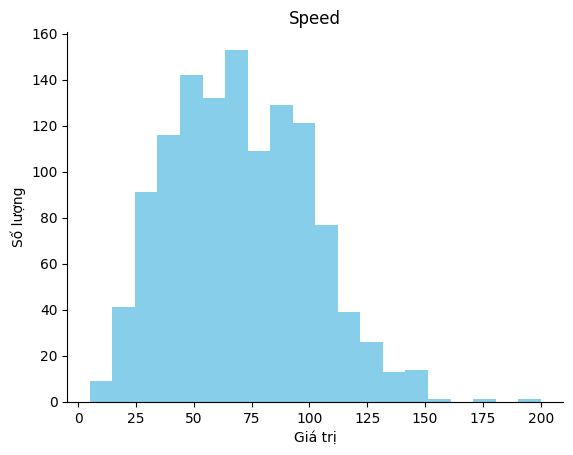

In [14]:
# @title Biểu đồ cột chỉ số Speed của tất cả Pokemon
df['Speed'].plot(kind='hist', bins=20, title='Speed', color='skyblue')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Giá trị')
plt.ylabel('Số lượng')

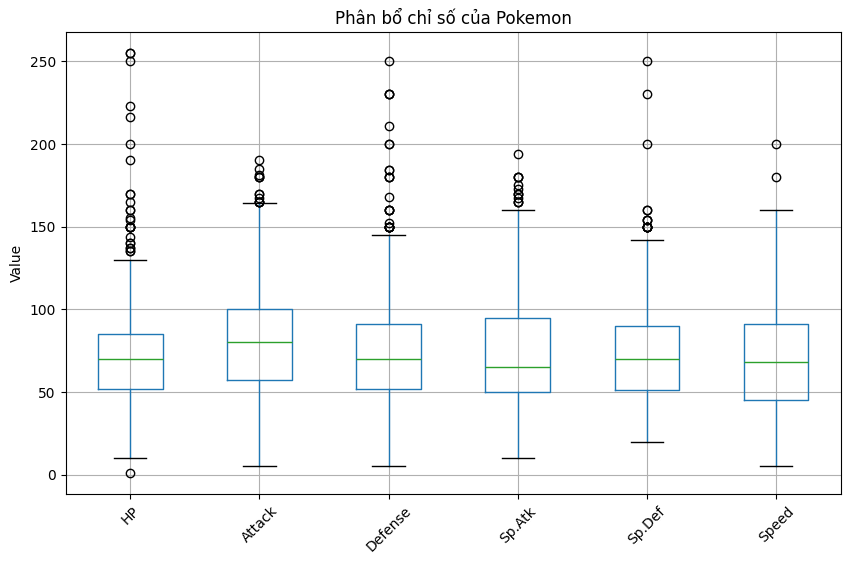

In [16]:
plt.figure(figsize=(10, 6))

df.boxplot(column=['HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'])
plt.title('Phân bổ chỉ số của Pokemon')
plt.ylabel('Value')
_ = plt.xticks(rotation=45)

In [18]:
def max_stats(df, col_list):
    '''Lấy giá trị Pokemon cao nhất của cột trong Data Frame'''
    message = ''
    for col in col_list:
        stat = df[col].max()
        name = df[df[col]==df[col].max()]['Name'].values[0]
        message += name+' có chỉ số '+col+' mạnh nhất là '+str(stat)+'.\n'
    return message

def min_stats(df, col_list):
    '''Lấy giá trị Pokemon thấp nhất của cột trong Data Frame'''
    message = ''
    for col in col_list:
        stat = df[col].min()
        name = df[df[col]==df[col].min()]['Name'].values[0]
        message += name+' có chỉ số '+col+' yếu nhất là '+str(stat)+' .\n'
    return message

In [20]:
stats=['Attack', 'Defense','HP', 'Sp.Atk','Sp.Def','Speed','Total']

print (max_stats(df, stats))

print (min_stats(df, stats))

Mewtwo Mega Mewtwo X có chỉ số Attack mạnh nhất là 190.
Eternatus Eternamax có chỉ số Defense mạnh nhất là 250.
Blissey có chỉ số HP mạnh nhất là 255.
Mewtwo Mega Mewtwo Y có chỉ số Sp.Atk mạnh nhất là 194.
Eternatus Eternamax có chỉ số Sp.Def mạnh nhất là 250.
Regieleki có chỉ số Speed mạnh nhất là 200.
Eternatus Eternamax có chỉ số Total mạnh nhất là 1125.

Chansey có chỉ số Attack yếu nhất là 5 .
Chansey có chỉ số Defense yếu nhất là 5 .
Shedinja có chỉ số HP yếu nhất là 1 .
Sandshrew Alolan Sandshrew có chỉ số Sp.Atk yếu nhất là 10 .
Caterpie có chỉ số Sp.Def yếu nhất là 20 .
Shuckle có chỉ số Speed yếu nhất là 5 .
Wishiwashi Solo Form có chỉ số Total yếu nhất là 175 .



In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[stats], alpha=0.2, figsize=(10, 10), diagonal='kde')

array([[<Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Defense', ylabel='Attack'>,
        <Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Sp.Atk', ylabel='Attack'>,
        <Axes: xlabel='Sp.Def', ylabel='Attack'>,
        <Axes: xlabel='Speed', ylabel='Attack'>],
       [<Axes: xlabel='Attack', ylabel='Defense'>,
        <Axes: xlabel='Defense', ylabel='Defense'>,
        <Axes: xlabel='HP', ylabel='Defense'>,
        <Axes: xlabel='Sp.Atk', ylabel='Defense'>,
        <Axes: xlabel='Sp.Def', ylabel='Defense'>,
        <Axes: xlabel='Speed', ylabel='Defense'>],
       [<Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Defense', ylabel='HP'>,
        <Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Sp.Atk', ylabel='HP'>,
        <Axes: xlabel='Sp.Def', ylabel='HP'>,
        <Axes: xlabel='Speed', ylabel='HP'>],
       [<Axes: xlabel='Attack', ylabel='Sp.Atk'>,
        <Axes: xlabel='Defense', ylabel='Sp.Atk'>,
        <Axes: xlabel='HP'

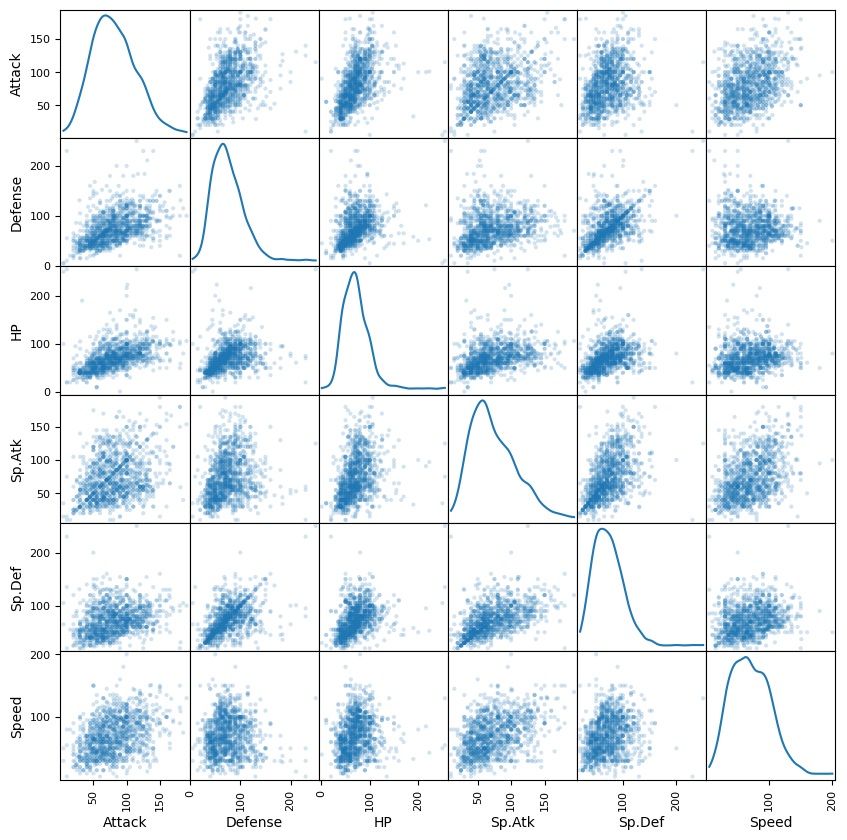

In [22]:
# @title Biểu đồ thể hiện sự tương quan của của các chỉ số
scatter_matrix(df[stats[:-1]], alpha=0.2, figsize=(10,10), diagonal='kde')

In [35]:
# Sử dụng phương thức str.split để tách các hệ, sau đó sử dụng explode để tạo các hàng riêng biệt
df['Type'] = df['Type'].str.split()
df_ex = df.explode('Type')

# Hiển thị kết quả
print(df_ex)

# Thống kê số lượng Pokémon theo từng hệ
type_counts = df_ex['Type'].value_counts()
print(type_counts)

         #                     Name    Type  Total   HP  Attack  Defense  \
0        1                Bulbasaur   Grass    318   45      49       49   
0        1                Bulbasaur  Poison    318   45      49       49   
1        2                  Ivysaur   Grass    405   60      62       63   
1        2                  Ivysaur  Poison    405   60      62       63   
2        3                 Venusaur   Grass    525   80      82       83   
...    ...                      ...     ...    ...  ...     ...      ...   
1211  1024    Terapagos Normal Form  Normal    450   90      65       85   
1212  1024  Terapagos Terastal Form  Normal    600   95      95      110   
1213  1024   Terapagos Stellar Form  Normal    700  160     105      110   
1214  1025                Pecharunt  Poison    600   88      88      160   
1214  1025                Pecharunt   Ghost    600   88      88      160   

      Sp.Atk  Sp.Def  Speed  
0         65      65     45  
0         65      65     45

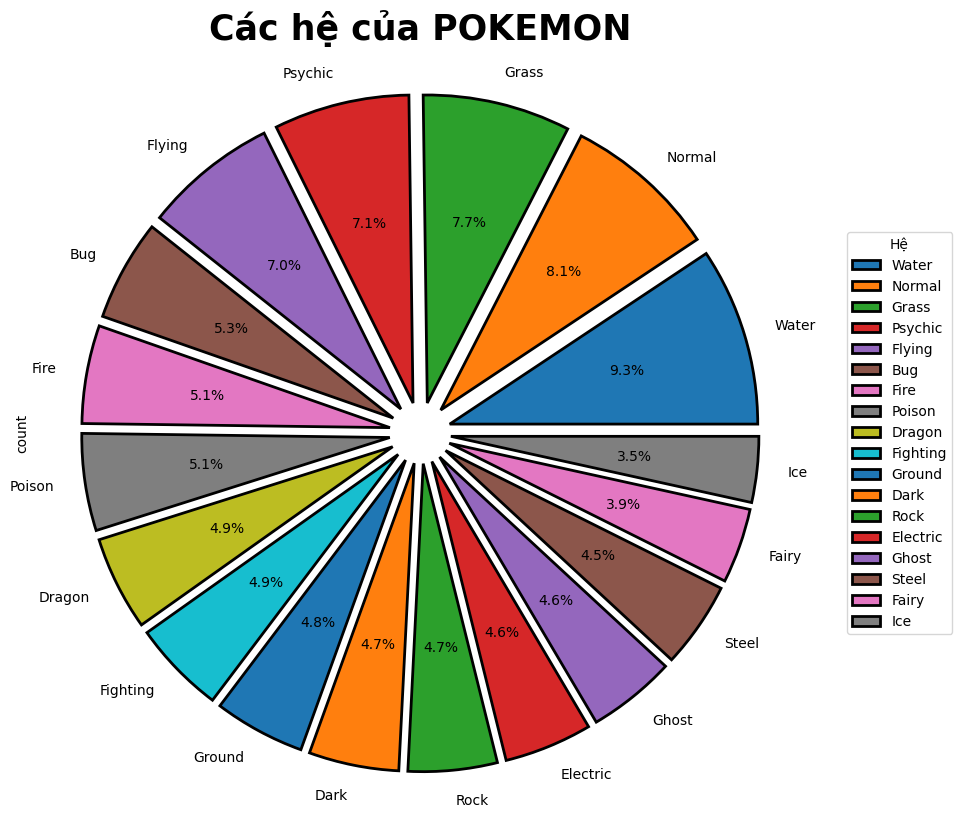

In [36]:
# @title Biểu đồ thể hiện các hệ của POKEMON
fig = plt.figure(figsize=(10,10))
wp = {'linewidth':2, 'edgecolor':"black"}
types = df_ex['Type'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
types.plot(kind='pie', autopct="%0.1f%%",explode = explode, wedgeprops = wp)
plt.legend(title="Hệ", loc='center right', bbox_to_anchor=(1.2, 0.5))
plt.title("Các hệ của POKEMON", loc='center', color='Black',fontsize='25',fontweight='bold')
plt.show()